In [366]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem=Memory("./mycache")

@mem.cache
def get_data():
    data=load_svmlight_file("D:\Ipython_data\Australian_scale.txt")
    return data[0],data[1]
x,y=get_data()

In [476]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [477]:
import numpy as np
import numpy
class LinearClassification(object):
    def __init__(self,Learning_rate=0.001,threshold=0.0,epoch=8):
        self.Learning_rate=Learning_rate
        self.epoch=epoch
     
    def fit(self,x,y,threshold,C):
        self.w=np.zeros((1,1+x.shape[1]))
        self.cost_list=[]
        self.threshold=threshold
        self.C=C
    
        #对每个x进行计算
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[0]):
                output=self.Classification_input(x[j,:],self.threshold)
                if(y[j]!=output):
                    #计算y*x
                    t=self.C*y[j]*x[j,:]
                    
                    #计算梯度
                    dw=self.w[0,1:]-t
                    
                    #计算cost
                    cost+=((1-y[j]*output)*self.C)
                    
                    #更新w
                    self.w[0,1:]=self.w[0,1:]+self.Learning_rate*dw
                    self.w[0,0]=self.w[0,0]+self.Learning_rate*(self.w[0,0]-self.C*y[j])
            self.w1=self.w.T
            cost+=((self.w1*self.w.T).sum())/2
            self.cost_list.append(cost)
        return self
          
    
    #计算每个f(X)
    def Classification_input(self,x,threshold):
        f=x*self.w[0,1:]+self.w[0,0]
        if(f>=threshold):
            return 1
        else:
            return -1

            

In [480]:
model=LinearClassification()
model.fit(x_train,y_train,0,1)
model2=LinearClassification()
model2.fit(x_test,y_test,0,1)

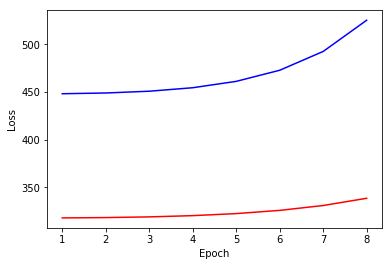

In [481]:
import matplotlib.pyplot as plt
plt.plot(range(1,model.epoch+1),model.cost_list,'b-',range(1,model2.epoch+1),model2.cost_list,'r-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [461]:
def get_training_data():
    data=load_svmlight_file("D:\Ipython_data\A9a.txt")
    return data[0],data[1]
x_train,y_train=get_training_data()
def get_testing_data():
    data=load_svmlight_file("D:\Ipython_data\A9at.txt")
    return data[0],data[1]
x_test,y_test=get_testing_data()

In [462]:
class LinearClassification(object):
    def __init__(self,Learning_rate=0.001,threshold=0.0,epoch=8):
        self.Learning_rate=Learning_rate
        self.epoch=epoch

    def fit_nag(self,x,Y,threshold,C):
        self.w=np.zeros((1,1+x.shape[1]))
        self.v=np.zeros((1,x.shape[1]))
        self.cost_list=[]
        self.threshold=threshold
        self.C=C
        self.y=0.9
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[0]):
                output=self.Classification_input(x[j,:],self.threshold)
                if(output!=Y[j]):
                    #计算动量项
                    t=Y[j]*(x[j,:])
                    #print('t.shape:',t.shape)
                    #print('self.w.shape:',self.w.shape)
                    #print('self.v.shape:',self.v.shape)
                    #print('self.y.shape:',self.y.shape)
                    dwv=-self.C*t+self.w[0,1:]-self.y*self.v
                    self.v=self.y*self.v+self.Learning_rate*dwv
                    
                    #计算cost值
                    cost+=(1-Y[j]*output)
                    #print('cost:',cost)
                    #更新w
                    self.w[0,1:]=self.w[0,1:]-self.v
                    self.w[0,0]=self.w[0,0]-self.v.sum()
            self.w1=self.w.T
            cost=cost+(self.w*self.w1).sum()/2
            self.cost_list.append(cost)
        return self
                    
    def fit_adadelta(self,x,Y,threshold,C):
        self.e=10**(-8)
        self.cost_list=[]
        self.w=np.zeros((1,1+x.shape[1]))
        self.v=np.zeros((1,1+x.shape[1]))
        self.threshold=threshold
        self.C=C
        self.y=0.9
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[0]):
                output=self.Classification_input(x[j,:],self.threshold)
                if(output!=Y[j]):
                    #计算梯度gt
                    t=Y[j]*(x[j,:])
                    g=self.w[0,1:]-self.C*t
                    
                    #计算E[g^2]t
                    g1=g.T
                    E=(g*g1).sum()
                    
                    #计算RMS[g]t
                    RMSgt=np.sqrt(self.e+E)
                    
                    #计算dθt,保留学习率
                    dw=(-self.Learning_rate/RMSgt)*g
                    
                    #计算E[dw^2]t-1
                    dw1=dw.T
                    Edwt=(dw*dw1).sum()
                    
                    #计算RMS[dw]t-1
                    RMSwt1=np.sqrt(Edwt+self.e)
                    
                    #计算dθt,去除学习率
                    dwt=-(RMSwt1/RMSgt)*g
                    
                    #计算E[dw^2]t,dw1是dw转置
                    dw1=dw.T
                    Edwt=self.y*Edwt+(1-self.y)*((dw*dw1).sum())
                    
                    #计算cost
                    cost+=(1-Y[j]*output)
                    
                    #更新w
                    self.w[0,1:]=self.w[0,1:]+dwt
                    self.w[0,0]=self.w[0,0]+dwt.sum()
            self.w1=self.w.T
            cost=cost+(self.w*self.w1).sum()/2
            self.cost_list.append(cost)
        return self
    
    def fit_rms(self,x,Y,threshold,C):
        self.e=10**(-8)
        self.cost_list=[]
        self.w=np.zeros((1,1+x.shape[1]))
        self.v=np.zeros((1,1+x.shape[1]))
        self.threshold=threshold
        self.C=C
        self.y=0.9
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[0]):
                output=self.Classification_input(x[j,:],self.threshold)
                if(output!=Y[j]):
                    #计算梯度gt
                    t=Y[j]*(x[j,:])
                    g=self.w[0,1:]-self.C*t
                    
                    #计算E[g^2]t
                    g1=g.T
                    E=(g*g1).sum()
                    
                    #计算RMS[g]t
                    RMSgt=np.sqrt(self.e+E)
                    
                    #计算dw
                    dw=(-self.Learning_rate/RMSgt)*g
                    
                    #计算cost
                    cost+=(1-Y[j]*output)
                    
                    #更新w
                    self.w[0,1:]=self.w[0,1:]+dw
                    self.w[0,0]=self.w[0,0]+dw.sum()
            self.w1=self.w.T
            cost=cost+(self.w*self.w1).sum()/2
            self.cost_list.append(cost)
        return self 
    
    def fit_Adam(self,x,Y,threshold,C):
        self.e=10**(-8)
        self.cost_list=[]
        self.w=np.zeros((1,1+x.shape[1]))
        self.m=np.zeros((1,x.shape[1]))
        self.v=0
        self.C=C
        self.threshold=threshold
        self.p1=0.9
        self.p2=0.999
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[1]):
                output=self.Classification_input(x[j,:],self.threshold)
                if(output!=Y[i]):
                    #计算梯度gt
                    t=Y[j]*(x[j,:])
                    g=self.w[0,1:]-self.C*t
                    
                    #计算m
                    self.m=self.m*self.p1+(1-self.p1)*g
                    
                    #计算m的修正误差M
                    M=self.m/(1-(self.p1**(j+1)))
                    
                    #计算v
                    g1=g.T
                    G=(g1*g).sum()
                    self.v=self.v*self.p2+(1-self.p2)*G
                    
                    #计算V
                    V=self.v/(1-(self.p2**(j+1)))
                    
                    #计算cost
                    cost+=(1-Y[j]*output)
                    
                    #计算W
                    self.w[0,1:]=self.w[0,1:]-(self.Learning_rate/(np.sqrt(V)+self.e))*M
                    self.w[0,0]=self.w[0,0]-((self.Learning_rate/(np.sqrt(V)+self.e))*M).sum()
            self.w1=self.w.T
            cost=cost+(self.w*self.w1).sum()/2
            self.cost_list.append(cost)
        return self 
                    
    
    def Classification_input(self,x,threshold):
        #print('x.shape:',x.shape)
        #print('w[0,1:].shape:',self.w[0,1:].shape)
        f=x*self.w[0,1:]+self.w[0,0]
        if(f>=threshold):
            return 1
        else:
            return -1

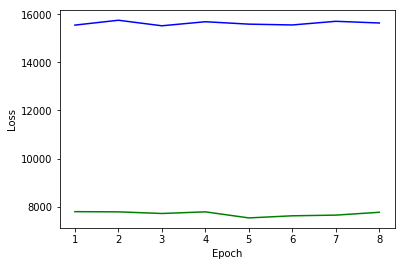

In [464]:
model3=LinearClassification()
model3.fit_nag(x_train,y_train,0,1)
model4=LinearClassification()
model4.fit_nag(x_test,y_test,0,1)

plt.plot(range(1,model3.epoch+1),model3.cost_list,'b-',range(1,model4.epoch+1),model4.cost_list,'g-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

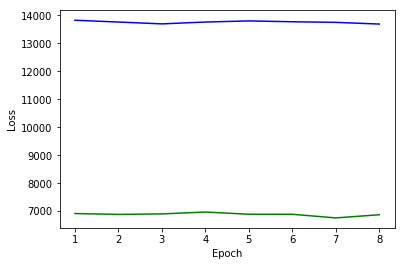

In [465]:
model5=LinearClassification()
model5.fit_adadelta(x_train,y_train,0,1)
model6=LinearClassification()
model6.fit_adadelta(x_test,y_test,0,1)

plt.plot(range(1,model5.epoch+1),model5.cost_list,'b-',range(1,model6.epoch+1),model6.cost_list,'g-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

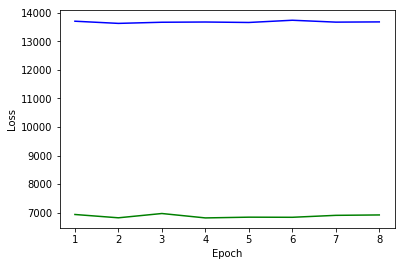

In [467]:
model7=LinearClassification()
model7.fit_rms(x_train,y_train,0,1)
model8=LinearClassification()
model8.fit_rms(x_test,y_test,0,1)

plt.plot(range(1,model7.epoch+1),model7.cost_list,'b-',range(1,model8.epoch+1),model8.cost_list,'g-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

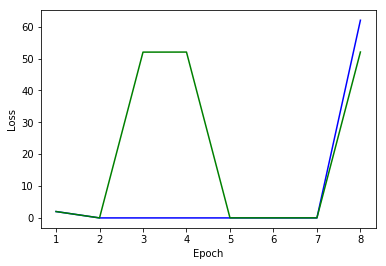

In [468]:
model9=LinearClassification()
model9.fit_Adam(x_train,y_train,0,1)
model10=LinearClassification()
model10.fit_Adam(x_test,y_test,0,1)

plt.plot(range(1,model9.epoch+1),model9.cost_list,'b-',range(1,model10.epoch+1),model10.cost_list,'g-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [475]:
class LogisticRegression(object):
    def __init__(self,Learning_rate=0.001,epoch=6):
        self.Learning_rate=Learning_rate
        self.epoch=epoch
        self.threshold=0.5
        self.y=0.9
        
    def fit_NAG(self,x,Y):
        self.w=np.zeros((1,x.shape[1]))
        self.cost_list=[]
        self.v=np.zeros((1,x.shape[1]))
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[0]):
                output=self.Logistic_input(x[j,:],self.threshold)
                if(output!=Y[j]):
                    t=-Y[j]*(x[j,:])
                    dwv=self.w-self.y*self.v
                    t=t.T.dot(dwv)
                    t=t.sum()
                    dv=self.w-(Y[j]*(x[j,:]))/(1+np.exp(t))
                    self.v*=self.y
                    self.v+=self.Learning_rate*dv
                    self.w=self.w-self.v
                    cost+=np.log(1+np.exp((-Y[j]*x[j,:].T.dot(self.w)).sum()))
            cost=cost/x.shape[0]+(self.w**2).sum()/2
            self.cost_list.append(cost)
        #print('self.cost_list:',self.cost_list)
        return self
    
    def fit_Rms(self,x,Y):
        self.e=10**(-8)
        self.cost_list=[]
        self.w=np.zeros((1,x.shape[1]))
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[0]):
                output=self.Logistic_input(x[j,:],self.threshold)
                if(output!=Y[j]):
                    #计算梯度gt
                    t=Y[j]*(x[j,:])
                    h=self.Logistic_input(t,self.threshold)
                    g=self.w-t*h
                   
                    #计算E[g^2]t
                    g1=g.T
                    E=g*g1
                    E=E.sum()
                    
                    #计算RMS[g]t
                    RMSgt=np.sqrt(self.e+E)
            
                    #计算dw
                    dw=(-self.Learning_rate/RMSgt)*g
                    
                    #更新w
                    self.w=self.w+dw
                    
                    #计算cost
                    cost+=np.log(1+np.exp((-Y[j]*x[j,:].T.dot(self.w)).sum()))
            self.w1=self.w.T
            cost=cost/x.shape[0]+(self.w*self.w1).sum()/2
            self.cost_list.append(cost)
        return self
    
    def fit_Adadelta(self,x,Y):
        self.e=10**(-8)
        self.cost_list=[]
        self.w=np.zeros((1,x.shape[1]))
        self.v=np.zeros((1,x.shape[1]))
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[0]):
                output=self.Logistic_input(x[j,:],self.threshold)
                if(output!=Y[i]):
                    #计算梯度gt
                    t=Y[j]*(x[j,:])
                    h=self.Logistic_input(t,self.threshold)
                    g=self.w-t*h
               
                    #计算E[g^2]t
                    g1=g.T
                    E=g*g1
                    E=E.sum()
                    #print('E:',E)
                    #E=np.mean(E)
                    
                    #计算RMS[g]t
                    RMSgt=np.sqrt(self.e+E)
                    
                    #计算dθt,保留学习率
                    dw=(-self.Learning_rate/RMSgt)*g
                    
                    #计算E[dw^2]t-1
                    dw1=dw.T
                    Edwt=dw*dw1
                    Edwt=Edwt.sum()
                    #Edwt=np.mean(Edwt)
                    
                    #计算RMS[dw]t-1
                    RMSwt1=np.sqrt(Edwt+self.e)
                    
                    #计算dθt，去掉学习率
                    
                    dwt=-(RMSwt1/RMSgt)*g
                    
                    #计算E[dw^2]t,dw1是dw转致
                    dw1=dw.T
                    Edwt=self.y*Edwt+(1-self.y)*((dw*dw1).sum())
                    
                    #Wt+1=Wt+dWt，更新w
                    #print(self.w.shape)
                    #print('dwt.shape:',dwt.shape)
                    self.w=self.w+dwt
                    #print('self.w.shape:',self.w.shape)
                    #print('self.x[j,:].shape:',x[j,:].shape)
                    
                    #计算cost
                    cost+=np.log(1+np.exp((-Y[j]*x[j,:].T.dot(self.w)).sum()))
                    #print(cost)
            self.w1=self.w.T
            cost=cost/x.shape[0]+(self.w*self.w1).sum()/2
            self.cost_list.append(cost)
        return self
        
    def fit_Adam(self,x,Y):
        self.e=10**(-8)
        self.cost_list=[]
        self.w=np.zeros((1,x.shape[1]))
        self.m=np.zeros((1,x.shape[1]))
        self.v=0
        self.p1=0.900
        self.p2=0.999
        for i in range(self.epoch):
            cost=0
            for j in range(x.shape[1]):
                output=self.Logistic_input(x[j,:],self.threshold)
                if(output!=Y[i]):
                    #计算梯度gt
                    t=Y[j]*(x[j,:])
                    h=self.Logistic_input(t,self.threshold)
                    g=self.w-t*h
                    
                    #计算m
                    self.m=self.m*self.p1+(1-self.p1)*g
                    
                    #计算m的修正误差M
                    M=self.m/(1-(self.p1**(j+1)))
                    
                    #计算v
                    g1=g.T
                    G=(g1*g).sum()
                    self.v=self.v*self.p2+(1-self.p2)*G
                    
                    #计算V
                    V=self.v/(1-(self.p2**(j+1)))
                    
                    #计算cost
                    cost+=np.log(1+np.exp((-Y[j]*x[j,:].T.dot(self.w)).sum()))
                    
                    #计算W
                    self.w=self.w-(self.Learning_rate/(np.sqrt(V)+self.e))*M
            self.w1=self.w.T
            cost=cost/x.shape[0]+(self.w*self.w1).sum()/2
            self.cost_list.append(cost)
        return self
    
    def Logistic_input(self,x,threshold):
        t=x.T.dot(self.w)
        t=t.sum()
        h=1/(1+np.exp(t))
        if(h<self.threshold):
            return -1
        else:
            return 1

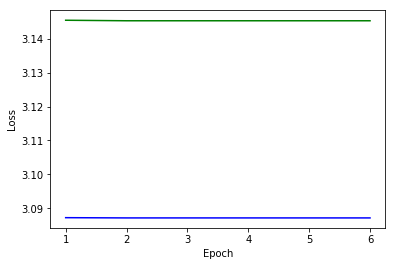

In [470]:
modela=LogisticRegression()
modela.fit_NAG(x_train,y_train)
modelb=LogisticRegression()
modelb.fit_NAG(x_test,y_test)

plt.plot(range(1,modela.epoch+1),modela.cost_list,'b-',range(1,modelb.epoch+1),modelb.cost_list,'g-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

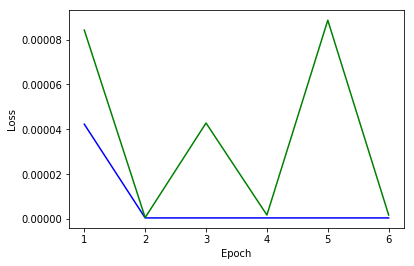

In [471]:
modelc=LogisticRegression()
modelc.fit_Adadelta(x_train,y_train)
modeld=LogisticRegression()
modeld.fit_Adadelta(x_test,y_test)
plt.plot(range(1,modelc.epoch+1),modelc.cost_list,'b-',range(1,modeld.epoch+1),modeld.cost_list,'g-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

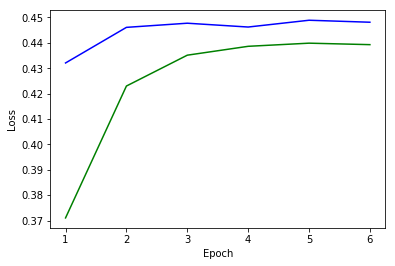

In [474]:
modele=LogisticRegression()
modele.fit_Rms(x_train,y_train)
modelf=LogisticRegression()
modelf.fit_Rms(x_test,y_test)
plt.plot(range(1,modele.epoch+1),modele.cost_list,'b-',range(1,modelf.epoch+1),modelf.cost_list,'g-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

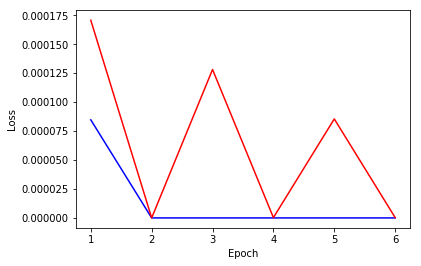

In [473]:
modelg=LogisticRegression()
modelg.fit_Adam(x_train,y_train)
modelh=LogisticRegression()
modelh.fit_Adam(x_test,y_test)
plt.plot(range(1,modelg.epoch+1),modelg.cost_list,'b-',range(1,modelh.epoch+1),modelh.cost_list,'r-')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()